# Bio-economic modelling

In [71]:
import handcalcs.render
import math as math
from sympy import * #symbolic algebra package
import numpy as np #numerical python packagee
import matplotlib.pyplot as plt #matplotlib is a plotting package
%matplotlib inline  
# without this plots are popouts

## Add fishing

Use the following catch equation to modify the computer code above to incorporate fishing into our model:

$Y = q X E$

where$$Y$$is catch, $$q$$ is the catchability and $$X$$ is the stock and $$E$$ fishing effort.

Produce a graph and vary fishing effort to see how the graph changes. Assume fishing effort is some cosntant.


The following is a discrete time model of stock dynamics with constant effort.

In [72]:
# Constants 
r = 1 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
q = 0.01 #catchability
x0 = 1 #initial value
#initialize values
x = np.zeros(10)  # vector of zeroes
E = np.zeros(10)

x[0] = x0 # pass initial value to vector

for i in range(0,len(x)-1):
     E[i] = 0.0000
     x[i+1] = x[i] + r*x[i]*(1-x[i]/K) # - q*x[i]*E[i]
print(i,x) 

8 [ 1.          1.99        3.940399    7.72553056 14.85422289 27.5019664
 47.44035125 72.37483323 92.36850161 99.41760232]


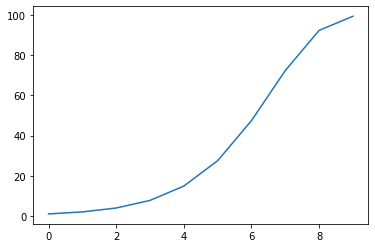

In [73]:
plt.plot(x)

## Exercise

Try varing the constant effort level to see what happens (Note: This was one of the exercises in the Introductory National and Regional Fisheries Economcis Workshops - so the computer code here is basically what I wrote at the backend of that exercise the only difference really is there I wrote it in R and here in Python and there we used a slide to vary effort)





## Economics

In [74]:
# Constants 
r = 1.4 # intrinsic growth rate
K = 100 # carrying capacity/unfished biomass
q = 0.01 #catchability
p = 1000 #price
c  = 2 # cost of fishing
d  = 0.1
x0 = 1 #initial value
n = 20 #time horizon
#initialize values
x = np.zeros(n)  # vector of zeroes
E = np.zeros(n)
t = np.zeros(n)
profit = np.zeros(n)
x[0] = x0 # pass initial value to vector

for i in range(0,len(x)-1):
     E[i] = 0.1
     x[i+1] = x[i] + r*x[i]*(1-x[i]/K) - q*x[i]*E[i]
     t[i] = i
     profit[i] = (p*q*x[i]*E[i] - c*E[i])*(1/(1 + d)**t[i]) # revenue  minus costs   
print(t,x) 
print(t,profit)
print("NPV:",sum(profit))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.  0.] [  1.           2.385        5.64197985  13.08946255  29.00294423
  57.80167238  91.89174542 102.23099699  98.93568734 100.31093072
  99.77396329  99.98992542  99.90403848  99.93835165  99.92466778
  99.93012877  99.92795002  99.92881937  99.9284725   99.9286109 ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.  0.] [ 0.8         1.98636364  4.49750401  9.68404399 19.67279847 35.76610662
 51.75759989 52.35803442 46.06092683 42.45680729 38.39007335 34.97576009
 31.76877931 28.89064777 26.26062185 23.87459991 21.70370758 19.73081525
 17.93704238  0.        ]
NPV: 508.5722326408433


Text(0.5, 0, 'Time')

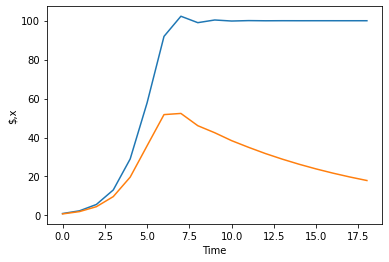

In [75]:


plt.plot(t[0:n - 1],x[0:n - 1])
plt.plot(t[0:n - 1],profit[0:n - 1])
plt.ylabel("$,x")
plt.xlabel("Time")
plt.legend(,("Stock","Profit"))

# Net Present Value

The stream of values represented by the orange curve is discounted back to the beginning of time $(t = 0)$. 
If we add these up we get the Net Present Value:

$$NPV = \sum_{i=0}^T \frac{1}{(1 + d)^t} Profit_i $$

where $d$ is the discount rate. Don't confuse discount rate and discount factor. the discount factor $\delta$ is

$$\delta = \frac{1}{1+d}$$.



In [76]:
print("NPV:",sum(profit))

NPV: 508.5722326408433


# Observations

- Observe what happens when you vary prices, costs, and discount rate

- Can you explain these effcts (Let's have a discussion discussion )?